<a href="https://colab.research.google.com/github/guilhermedossantos/First_Net_from_scratch/blob/master/early_stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tentativa de incorporação do Early Stopping utilizando os dados admission

In [0]:
#setup
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


#### Importação e tratamento

In [0]:
url = "https://raw.githubusercontent.com/guilhermedossantos/First_Net_from_scratch/master/admission.csv"
dados = pd.read_csv(url)
dados = dados.drop(columns = 'altura')
#dados = dados.apply(lambd)
dados['ones'] = pd.Series(np.ones(shape = len(dados))) # coluna para "intercepto"
dados.iloc[:, 1:4] = dados.iloc[:,1:4].apply(lambda x : (x - x.min())/(x.max() - x.min())) # normalização min-max
dados.head()

,admit,gre,gpa,rank,ones
0,0,0.293638,0.775862,0.666667,1.0
1,0,0.177814,0.385057,1.000000,1.0
2,0,0.357259,0.471264,0.333333,1.0
3,0,0.513866,0.954023,0.333333,1.0
4,0,0.378467,1.000000,1.000000,1.0


In [0]:
treino =  np.random.choice(size = 250, a = np.linspace(start = 0, stop = len(dados) - 1, num = len(dados), dtype = int), replace=False)
teste = np.array([j for j in range(len(dados)) if not j in treino], dtype = int)
val = np.random.choice(a = teste, size = 75, replace=False)
teste = np.array(list(set(teste) - set(val)), dtype = int) # diferença de conjuntos para pegar os elementos de teste que não estão em val

print(sorted(treino))
print(sorted(teste))
print(sorted(val))

[0, 1, 2, 4, 5, 6, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 32, 40, 41, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 58, 61, 62, 63, 65, 69, 70, 71, 73, 75, 76, 77, 78, 80, 82, 83, 84, 85, 86, 88, 91, 92, 94, 96, 97, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 117, 118, 120, 121, 122, 123, 124, 126, 128, 132, 133, 134, 135, 139, 141, 142, 143, 148, 151, 152, 153, 154, 157, 158, 160, 162, 163, 165, 166, 167, 168, 169, 170, 173, 176, 180, 181, 182, 183, 184, 185, 186, 188, 190, 193, 195, 196, 197, 199, 201, 206, 207, 208, 209, 210, 213, 214, 215, 217, 219, 220, 221, 224, 226, 227, 228, 229, 230, 234, 237, 240, 242, 243, 244, 245, 247, 248, 250, 251, 254, 255, 256, 257, 258, 259, 260, 267, 268, 270, 271, 272, 275, 276, 277, 278, 280, 281, 285, 286, 287, 289, 290, 292, 293, 295, 296, 297, 299, 300, 301, 302, 303, 305, 306, 307, 308, 309, 310, 311, 312, 314, 315, 316, 317, 319, 320, 321, 322, 323, 324, 325, 327, 329, 330, 331, 332, 334, 335, 339

In [0]:
X_treino, X_val, X_teste = (dados.iloc[treino, 1:], dados.iloc[val, 1:], dados.iloc[teste, 1:]) 
y_treino, y_val, y_teste = (dados.iloc[treino, 0], dados.iloc[val, 0], dados.iloc[teste, 0])

In [0]:
# Função sigmoide
def sigmoid(x):
  return 1/(1 + np.exp(-x))

# Derivada
def deriv_sigmoid(x):
  return sigmoid(x)*(1 - sigmoid(x))


In [0]:
### Pesos
n = X_treino.shape[1] #número de entradas


W01 = np.random.rand(n,4) - 0.5
W23 = np.random.rand(4) - 0.5
#W01 = np.full(shape = (n, 4), fill_value = 0.5)
#W12 = np.full(shape = (4, 4), fill_value = 0.5)
#W23 = np.full(shape = (4), fill_value = 0.5)



In [0]:
# Rede com daus camadas
def rede_1(x, only_predict = True):
  # X sendo um vetor e w sendo uma matriz, essa função deve retornar a estimativa para o neuronio de saída
  # Pretendo colocar 4 neurônios na camada escondida
  h1 = sigmoid(W01 @ x) # @ operador de multiplicação matricial (poderia usar np.matmul também)
  h2 = sigmoid(W23 @ h1) # usei W23 pois já havia criado desta forma
  if only_predict:
    return(h2)
  else:
    return([h1,h2])

# Rede com três camadas (tentar depois)
#def rede_2(x, only_predict = True):
#  h1 = sigmoid(x @ W01) # @ operador de multiplicação matricial (poderia usar np.matmul também)
#  h2 = sigmoid(h1 @ W12)
#  h3 = sigmoid(h1 @ W23)
#  if only_predict:
#    return(h3)
#  else:
#    return([h1,h2,h3])
 

W01 @ np.array(X_treino.iloc[1])

array([ 0.39379806,  0.17855565, -0.19382132,  0.27194404])

In [0]:
lr = 1 # Taxa de aprendizado 
serr = 0
epochs = 1000 # Diminuí aqui pra 500 pois aumentei a taxa de aprendizado para testar (diminuir gradualmente conforme as épocas) mas depois disso passou a convergir rapidamente para um mínimo
mse = np.zeros(epochs)
eqm_val = np.zeros(epochs)
 

# Forward prop
for i in range(epochs):
  serr = 0
  eqm_val[i] = np.mean((y_val - X_val.apply(rede_1, axis = 1))**2)
  for j in range(len(X_treino)):
    fprop = rede_1(X_treino.iloc[j], only_predict = False) 
    # Guardando os valores de ativação da camada intermediaria
    v = fprop[0]
    
    # Valor de saída da rede
    yhat = fprop[1]
    
    # Computação dos erros e dos deltas (variações nos pesos)
    erro = (y_treino.iloc[j] - yhat)  
    serr += erro**2 # soma dos erros quadráticos para poder calcular o mse depois
    
    deltap = erro*deriv_sigmoid(v @ W23)
    phi_j = deltap*W23*v*(1-v)
    d_w12 = lr/(i + 1)*deltap*v
    d_w01 = lr/(i + 1)*np.outer(phi_j,X_treino.iloc[j])
    
    W01 = W01 + d_w01
    W23 = W23 + d_w12
  mse[i] = serr/len(X_treino)
  print(" época = ", i, "\n MSE: ", round(serr/len(X_treino), 3))

 época =  0 
 MSE:  0.225
 época =  1 
 MSE:  0.202
 época =  2 
 MSE:  0.184
 época =  3 
 MSE:  0.168
 época =  4 
 MSE:  0.155
 época =  5 
 MSE:  0.143
 época =  6 
 MSE:  0.134
 época =  7 
 MSE:  0.126
 época =  8 
 MSE:  0.12
 época =  9 
 MSE:  0.115
 época =  10 
 MSE:  0.11
 época =  11 
 MSE:  0.106
 época =  12 
 MSE:  0.103
 época =  13 
 MSE:  0.1
 época =  14 
 MSE:  0.097
 época =  15 
 MSE:  0.095
 época =  16 
 MSE:  0.093
 época =  17 
 MSE:  0.091
 época =  18 
 MSE:  0.089
 época =  19 
 MSE:  0.088
 época =  20 
 MSE:  0.086
 época =  21 
 MSE:  0.085
 época =  22 
 MSE:  0.084
 época =  23 
 MSE:  0.083
 época =  24 
 MSE:  0.082
 época =  25 
 MSE:  0.081
 época =  26 
 MSE:  0.08
 época =  27 
 MSE:  0.079
 época =  28 
 MSE:  0.078
 época =  29 
 MSE:  0.078
 época =  30 
 MSE:  0.077
 época =  31 
 MSE:  0.076
 época =  32 
 MSE:  0.076
 época =  33 
 MSE:  0.075
 época =  34 
 MSE:  0.075
 época =  35 
 MSE:  0.074
 época =  36 
 MSE:  0.074
 época =  37 
 M

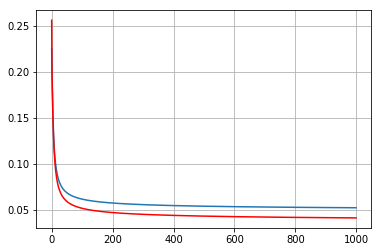

In [0]:
import matplotlib.pyplot as plt
plt.plot(mse)
plt.plot(eqm_val, 'r')
plt.grid(True)

Bom, achei um pouco contra-intuitivo o erro na base de validação ser menor que na base de treino - curioso a respeito do quão comum isso é. 

E além disso, o erro na base de validação não parece aumentar (nesse caso parece que não há necessidade de incorporar o early stop).

In [0]:
preds = np.array([rede_1(X_teste.iloc[j]) for j in range(len(X_teste))])
preds1 = np.where(preds > 0.5, 1, 0)

#print(preds1)
#print(y_teste)
pd.crosstab( y_teste, preds1)
#acc = 

col_0,0,1
admit,,
0,53,3
1,0,19


In [0]:
# Tentativa de avaliação com algumas metricas simples aqui 
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, recall_score, accuracy_score, f1_score, classification_report

preds = np.array([rede_1(X_teste.iloc[j]) for j in range(len(X_teste))])
preds1 = np.where(preds > 0.5, 1, 0)

# Avaliando com a AUC 
auc = roc_auc_score(y_teste, preds)
#print(round(auc,4))
# matriz de confusão
print(confusion_matrix(y_teste, preds1))
#acurácia
acc = accuracy_score(y_teste, preds1) # acurácia
print("acurácia teste:", acc)
rec = recall_score(y_teste, preds1)
print("recall", rec)
print("teste \n", classification_report(y_teste, preds1))


preds = np.array([rede_1(X_val.iloc[j]) for j in range(len(X_val))])
preds1 = np.where(preds > 0.5, 1, 0)

auc = roc_auc_score(y_val, preds)
print(round(auc,4))
confusion_matrix(y_val, preds1)
(sum(np.where(preds1 == y_val, 1, 0)))/75 # acurácia
print("validação \n", classification_report(y_val, preds1))

[[53  3]
 [ 0 19]]
acurácia teste: 0.96
recall 1.0
teste 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.86      1.00      0.93        19

    accuracy                           0.96        75
   macro avg       0.93      0.97      0.95        75
weighted avg       0.97      0.96      0.96        75

0.9918
validação 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.95      0.88      0.91        24

    accuracy                           0.95        75
   macro avg       0.95      0.93      0.94        75
weighted avg       0.95      0.95      0.95        75



In [0]:
#

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.95      0.88      0.91        24

    accuracy                           0.95        75
   macro avg       0.95      0.93      0.94        75
weighted avg       0.95      0.95      0.95        75

